In [1]:
from matplotlib import pyplot as plt
from sklearn import cluster,datasets
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import warnings

# Part 1. K-means Clustering Analysis

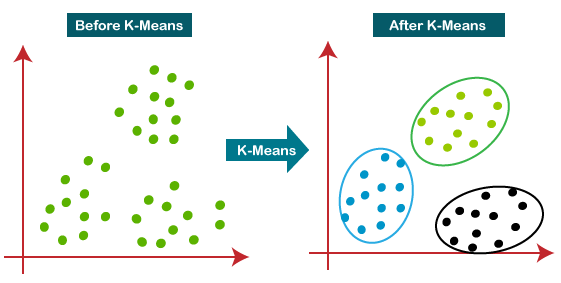

###### Using k-means

k-means alogrithm works by randomly select k data points as the centroids of the k clusters. Then it beings to calculate distance of each data point to each cluster, and assigns each data point to the closest cluster.<br>
After the first iteration, the centroid of the cluster is recalculated by calculating the mean of the data points in the cluster. Step 1 is performed again, and if the clusters are changed, then it keeps on going till the maximum iterations; and if the clusters remain the same, it stops.
We can perform k-means n number of times and pick the best cluster(which has least variance in it)

### K-means algorithm:

* Get the distance for each point from each centre
* Assign data point to the closest center
* Re-compute the center of the cluster by taking mean of the data points in the cluster
* Check if there is any movement between the clusters:
* If yes, continue the same process again
* If no, terminate

### Self-Implementation of K-Means

In [2]:
def plot(main_df,centroids,n):
#Plotting clusters
    color = ["#386cb0", "#ff3232", "#cccc00" ]
    marker = ['^','s','o']

    fig, ax = plt.subplots(figsize= (10, 6))

    # Background color
    fig.patch.set_facecolor("#fbf9f4")
    ax.set_facecolor("#fbf9f4")

    for i in range(n):
        plt.scatter(main_df[i]['X'],main_df[i]["Y"],
                    color=color[i],
                    marker = marker[i],
                    alpha=0.6)
    
    plt.scatter(centroids.T[0],centroids.T[1],marker='o',linewidths=8,color='k',label='Centroids',s=60,zorder=10,alpha=0.9)
    plt.scatter(centroids.T[0],centroids.T[1],marker='x',color='w',s=100,zorder=11,alpha=1)
    
    plt.legend(loc='upper left')
    plt.show()

def k_means_implementation(x, mu):
#Implementing kmeans: Given a dataset and initial centroid, computing optimal clusters
    n_clusters = mu.shape[0]
 
    differences = []
    for center in mu:
        dist = (x - center)**2
        
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        differences.append(dist.tolist())
    d = np.array(differences)
    indx = np.argsort(d.T)[:,0]
    
    clusters=[]
    mu_updated = []
    for i in range(n_clusters):
        
        center = mu[i]
        idx = np.where(indx==i)
        data = x[idx]
        clusters.append(data.tolist())
    
        mu_updated.append(np.mean(data.tolist(),axis=0).tolist())
        
    
    main_df_initial = []
    for val in range(n_clusters):
        df = pd.DataFrame(clusters[val],columns=['X','Y'])
        main_df_initial.append(df)
        
        
    new_clusters=[]  
    while clusters!=new_clusters:   
        
        differences = []
        for center in mu_updated:
            dist = (x - center)**2
            dist = np.sum(dist, axis=1)
            dist = np.sqrt(dist)
            differences.append(dist.tolist())

        d = np.array(differences)
        indx = np.argsort(d.T)[:,0]
        mu = mu_updated.copy()
        clusters = new_clusters.copy()
        new_clusters=[]
        mu_updated = []
        for i in range(n_clusters):

            center = mu[i]
            idx = np.where(indx==i)
            data = x[idx]
            new_clusters.append(data.tolist())

            mu_updated.append(np.mean(data.tolist(),axis=0).tolist())
            
    main_df = []
    for val in range(n_clusters):
        df = pd.DataFrame(new_clusters[val],columns=['X','Y'])
        main_df.append(df)
    plot(main_df,np.array(mu_updated),n_clusters)
    return main_df_initial,main_df,np.array(mu_updated)

In [3]:
# Load data
X = np.load('./Data/kmeans_data_1.npy')

mu_a = np.array([[5,-10],[-5,5],[-15,-10]]) 
mu_b = np.array([[-5,0],[-5,0.2],[-5.2,0]]) 
mu_c = np.array([[-6,-5],[1.9,1.9],[2.,2.]]) 

plt.figure(figsize=(10,6)) # do not change, this makes the figure size readable

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

#### Plotting Results

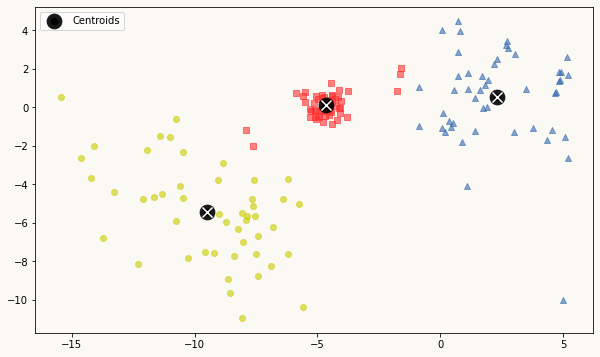

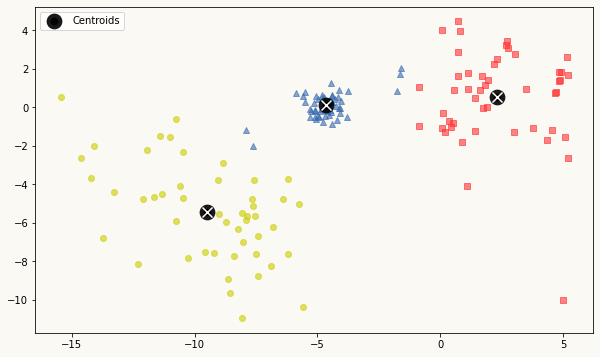

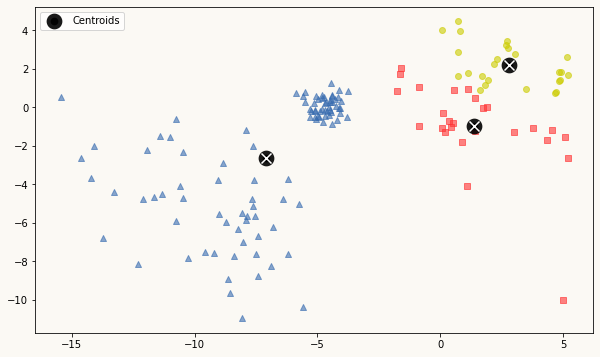

In [4]:
df_ini_1,df_main_1,c1= k_means_implementation(X,mu_a)
df_ini_2,df_main_2,c2= k_means_implementation(X,mu_b)
df_ini_3,df_main_3,c3= k_means_implementation(X,mu_c)

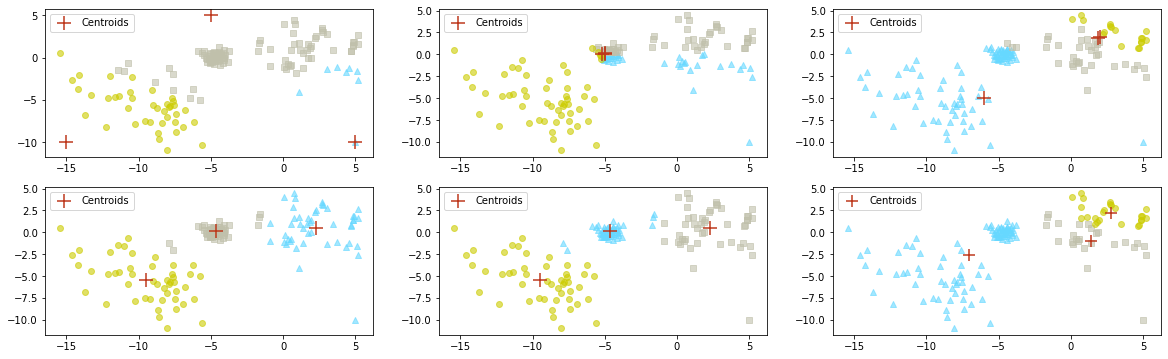

In [5]:
color  = ["#66d8ff", "#c0c0ab", "#cccc00" ]
marker = ['^','s','o']    
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(20,6))


for i in range(3):
    ax[0,0].scatter(df_ini_1[i]['X'],df_ini_1[i]['Y'],
                color=color[i],
                marker = marker[i],
                alpha=0.6)
    
ax[0,0].scatter(mu_a.T[0],mu_a.T[1],marker='+',color='#BD371B',s=200,label='Centroids')

for i in range(3):
    ax[0,1].scatter(df_ini_2[i]['X'],df_ini_2[i]['Y'],
                color=color[i],
                marker = marker[i],
                alpha=0.6)
    
ax[0,1].scatter(mu_b.T[0],mu_b.T[1],marker='+',color='#BD371B',s=200,label='Centroids')

for i in range(3):
    ax[0,2].scatter(df_ini_3[i]['X'],df_ini_3[i]['Y'],
                color=color[i],
                marker = marker[i],
                alpha=0.6)

ax[0,2].scatter(mu_c.T[0],mu_c.T[1],marker='+',color='#BD371B',s=200,label='Centroids')


for i in range(3):
    ax[1,0].scatter(df_main_1[i]['X'],df_main_1[i]['Y'],
                color=color[i],
                marker = marker[i],
                alpha=0.6)
    
ax[1,0].scatter(c1.T[0],c1.T[1],marker='+',color='#BD371B',s=200,label='Centroids')

for i in range(3):
    ax[1,1].scatter(df_main_2[i]['X'],df_main_2[i]['Y'],
                color=color[i],
                marker = marker[i],
                alpha=0.6)
    
ax[1,1].scatter(c2.T[0],c2.T[1],marker='+',color='#BD371B',s=200,label='Centroids')


for i in range(3):
    ax[1,2].scatter(df_main_3[i]['X'],df_main_3[i]['Y'],
                color=color[i],
                marker = marker[i],
                alpha=0.6)

ax[1,2].scatter(c3.T[0],c3.T[1],marker='+',color='#BD371B',s=160,label='Centroids')

ax[0,0].legend()
ax[0,1].legend()
ax[0,2].legend()
ax[1,0].legend()
ax[1,1].legend()
ax[1,2].legend()

plt.show()

### Sklearn Implementation

In [6]:
from sklearn.cluster import KMeans

def partition(x, mu):
    """
    The function that produces a partition given the mean points use Euclidean distance
    Each input is numpy array:
        - X: (N, d), tha data
        - mu: (C, d), the mean points
    Returns:
        partition: (N), the label of partition that each datapoint belongs to
    """

    n_clusters = mu.shape[0]
    differences = []
    for center in mu:
        dist = (x - center)**2
        dist = np.sum(dist, axis=1)
        dist = np.sqrt(dist)
        differences.append(dist.tolist())
    d = np.array(differences)
    indx = np.argsort(d.T)[:,0]
    
    return indx

In [7]:
#Original partitions
labels_a = partition(X,mu_a)
labels_b = partition(X,mu_b)
labels_c = partition(X,mu_c)

In [8]:
#new partitions with updated centroids
n = mu_a.shape[0]
kmeans = KMeans(n_clusters=n, random_state=0,init=mu_a,).fit(X)
mu_a_updated = kmeans.cluster_centers_
labels_a_updated = partition(X,mu_a_updated)

kmeans = KMeans(n_clusters=n, random_state=0,init=mu_b).fit(X)
mu_b_updated = kmeans.cluster_centers_
labels_b_updated = partition(X,mu_b_updated)

kmeans = KMeans(n_clusters=n, random_state=0,init=mu_c).fit(X)
mu_c_updated = kmeans.cluster_centers_
labels_c_updated = partition(X,mu_c_updated)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


#### Plotting Results

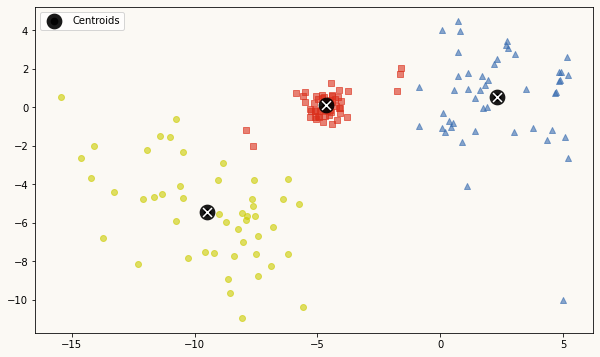

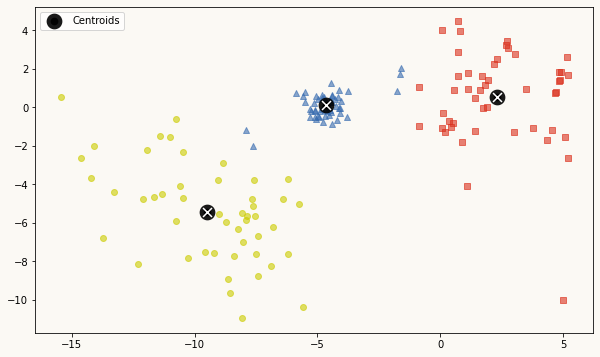

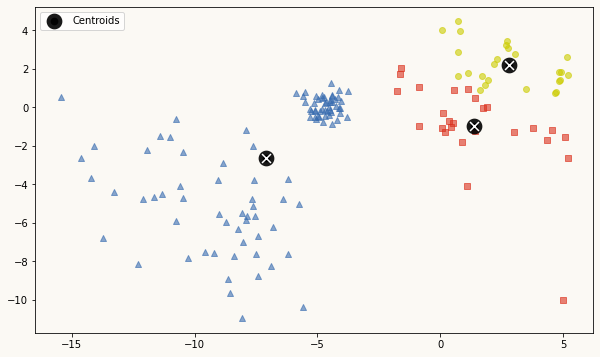

In [9]:
def plot_final_clusters(X,labels,mu):
    #Plotting final partitions
    df = pd.DataFrame(X,labels,columns=['X','Y'])
    df.reset_index(inplace=True)
    df.rename({"index":"Cluster"},axis=1,inplace=True)
    mu = np.array(mu)
    
    color = ["#386cb0", "#da2f1b", "#cccc00" ]
    marker = ['^','s','o']
    fig, ax = plt.subplots(figsize= (10, 6))
    fig.patch.set_facecolor("#fbf9f4")
    ax.set_facecolor("#fbf9f4")

    for i in range(3):
        plt.scatter(df[df['Cluster']==i]['X'],df[df['Cluster']==i]['Y'],
                    color=color[i],
                    marker = marker[i],
                    alpha=0.6)
    plt.scatter(mu.T[0],mu.T[1],marker='o',linewidths=8,color='k',label='Centroids',s=60,zorder=10,alpha=0.9)
    plt.scatter(mu.T[0],mu.T[1],marker='x',color='w',s=80,zorder=11,alpha=1)
    plt.legend(loc='upper left')
    plt.show()


plot_final_clusters(X,labels_a_updated,mu_a_updated)
plot_final_clusters(X,labels_b_updated,mu_b_updated)
plot_final_clusters(X,labels_c_updated,mu_c_updated)

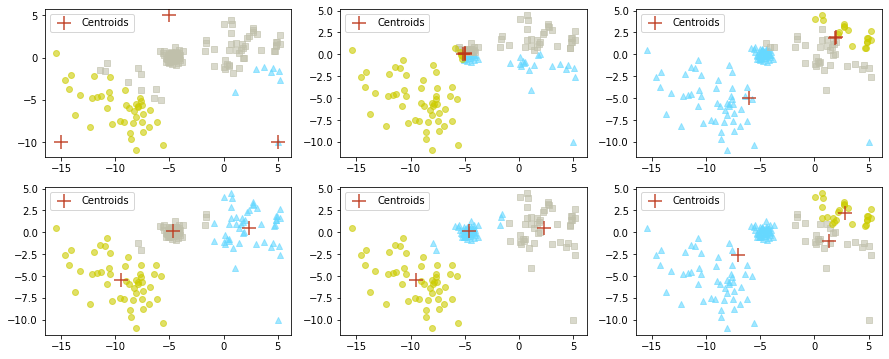

In [10]:
def plot_both_clusters(X,labels,mu,row,col):
    #Plotting initial and final partitions
    
    df = pd.DataFrame(X,labels,columns=['X','Y'])
    df.reset_index(inplace=True)
    df.rename({"index":"Cluster"},axis=1,inplace=True)
    mu = np.array(mu)
    
    color  = ["#66d8ff", "#c0c0ab", "#cccc00" ]
    marker = ['^','s','o']    

    for i in range(3):
        ax[row,col].scatter(df[df['Cluster']==i]['X'],df[df['Cluster']==i]['Y'],
                    color=color[i],
                    marker = marker[i],
                    alpha=0.6)

    ax[row,col].scatter(mu.T[0],mu.T[1],marker='+',color='#BD371B',s=200,label='Centroids',alpha=0.9)
    ax[row,col].legend()

fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(15,6))

plot_both_clusters(X,labels_a,mu_a,0,0)
plot_both_clusters(X,labels_b,mu_b,0,1)
plot_both_clusters(X,labels_c,mu_c,0,2)
    
plot_both_clusters(X,labels_a_updated,mu_a_updated,1,0)
plot_both_clusters(X,labels_b_updated,mu_b_updated,1,1)
plot_both_clusters(X,labels_c_updated,mu_c_updated,1,2)

#### Plotting Decision Boundary

In [11]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel1")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


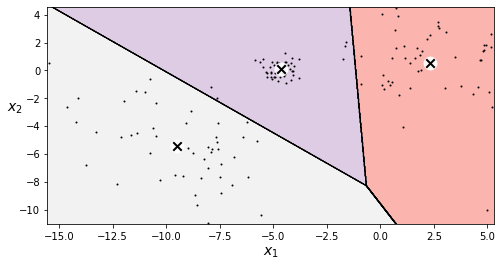

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


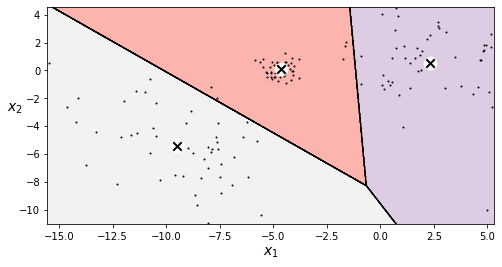

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:984: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


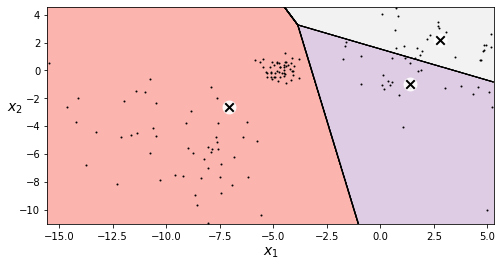

In [12]:
kmeans = KMeans(n_clusters=3, random_state=0,init=mu_a).fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

kmeans = KMeans(n_clusters=3, random_state=0,init=mu_b).fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()


kmeans = KMeans(n_clusters=3, random_state=0,init=mu_c).fit(X)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

[Reference](https://github.com/ageron/handson-ml2)

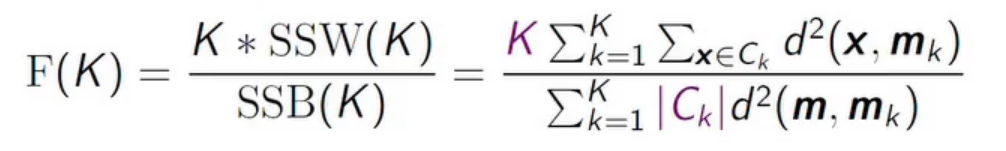

**SSW** : Within cluster scatter<br>
**SSB** : Between cluster scatter

#### Implementing F-ratio

In [13]:
# (a) Implement the scatter-based F-ratio index in Python where Euclidean distance is used
from sklearn.metrics.pairwise import euclidean_distances

def f_ratio_euclidean(X,lb):
    """
    # Compute the f-ratio = k * ssw / ssb
    Input:
        - X: (n,d), n datapoints each with d dimension
        - lb: (n,) label of each datapoint, each element is an
              integer, >=0, <n.
    Return:
        - f_ratio = k * ssw / ssb: scalar
    """ 

    k = len(np.unique(lb))
    _,d = np.shape(X)
    n = np.zeros(k)
    
    centres = []
    clust_var = []
    for i in range(k):
        indxs = np.where(lb==i)
        X_clust = X[indxs] 
        center = np.mean(X_clust,axis=0).tolist()
        centres.append(center)
        dist = (X_clust - center)**2
    
        sum_v = np.sum(dist)        
        clust_var.append(sum_v)
    ssw = np.sum(clust_var)
    
    global_center = np.array([np.mean(X.T[0]),np.mean(X.T[1])])
    ssb = 0
    for i in range(k):
        center = centres[i]
        
        dist = (global_center - center)**2
        dist = np.sum(dist)
        
        indxs = np.where(lb==i)
        X_clust = X[indxs]
        ssb= ssb + (dist * len(X_clust))
    f_ratio =  k*(ssw/ssb)
    return f_ratio

warnings.filterwarnings('ignore')

In [14]:
################
# (b) run the the K-means each with 3 different random initialisations for different K

X = np.load('./Data/kmeans_data_2.npy')

from numpy import random
seeds = []

seeds.append(random.randint(100))
seeds.append(random.randint(100))
seeds.append(random.randint(100))

k = [i for i in range(2,11)]
f_ratio_ls = []
best_seed = {}

for k_val in k:
    f_min = []
    for iters in range(3):
        
        kmeans = KMeans(n_clusters=k_val,init='random',random_state=seeds[iters],n_init=1)
        indx = kmeans.fit_predict(X)
        f = f_ratio_euclidean(X,indx)
        f_min.append(f)
        
    f_ratio_ls.append(np.sort(f_min)[0])
    v = np.argsort(f_min)[0]
    best_seed[k_val] = seeds[v] 

In [15]:
best_seed

{2: 35, 3: 35, 4: 14, 5: 35, 6: 35, 7: 14, 8: 14, 9: 35, 10: 35}

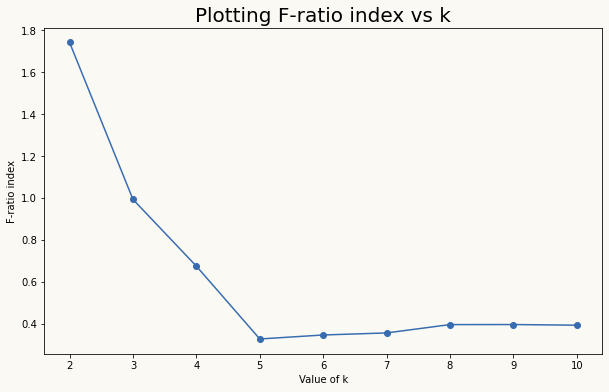

In [16]:
fig, ax = plt.subplots(figsize= (10, 6))
fig.patch.set_facecolor("#fbf9f4")
ax.set_facecolor("#fbf9f4")

plt.plot(k,f_ratio_ls,marker='o',color='#386cb0')
plt.xlabel("Value of k")
plt.ylabel("F-ratio index")
plt.title("Plotting F-ratio index vs k",size=20)
plt.show()

As the plot describes, the optimal number of k is 5.<br>
The elbow point is achieved at k=5

#### Plotting data with optimal number of clusters

In [17]:
from sklearn.cluster import KMeans

def kmeans_2(x,n,seed):
   # Function to partition given dataset and number of clusters
    
    kmeans = KMeans(n_clusters=n,init='random',random_state=seed,n_init=1)
    indx = kmeans.fit_predict(x)

    clusters=[]
    mu_updated = []
    for i in range(n):

        idx = np.where(indx==i)
        data = x[idx]
        clusters.append(data.tolist())

        mu_updated.append(np.mean(data.tolist(),axis=0).tolist())   
    
    main_df = []
    for val in range(n):
        df = pd.DataFrame(clusters[val],columns=['X','Y'])
        df['Cluster'] = val
        main_df.append(df)
        
    return pd.concat(main_df),np.array(mu_updated)

In [18]:
# Partition corresponding to optimal number of clusters and best random seed
df,mu = kmeans_2(X,5,best_seed[5])

<Figure size 576x216 with 0 Axes>

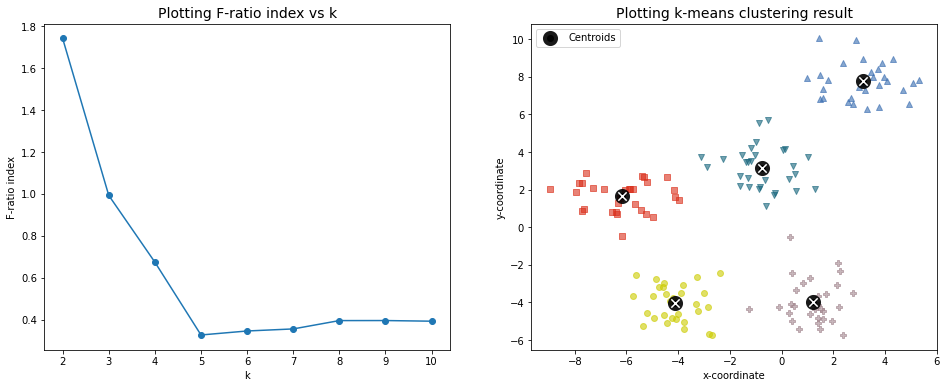

In [19]:
# Now, plot f_ratio with number of clusters, print the best k and create another plot for cluster visualization
# You can use the plt.subplot call to organize this and the following figure from (c) in one row.
plt.figure(figsize=(8,3)) # Do not change.

# (c) Display the final partition with optimal number of clusters

color = ["#386cb0", "#da2f1b", "#cccc00","#a2868e","#16657c" ]
marker = ['^','s','o','P','v']
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(16,6))

ax[0].plot(k,f_ratio_ls,marker='o')
ax[0].set_xlabel("k")
ax[0].set_ylabel("F-ratio index")
ax[0].set_title("Plotting F-ratio index vs k",size=14)

for i in range(5):
    ax[1].scatter(df[df['Cluster']==i]['X'],df[df['Cluster']==i]['Y'],
                color=color[i],
                marker = marker[i],
                alpha=0.6)
ax[1].scatter(mu.T[0],mu.T[1],marker='o',linewidths=8,color='k',label='Centroids',s=50,zorder=10,alpha=0.9)
ax[1].scatter(mu.T[0],mu.T[1],marker='x',color='w',s=70,zorder=11,alpha=1)

ax[1].legend(loc='upper left')

ax[1].set_xlabel("x-coordinate")
ax[1].set_ylabel("y-coordinate")
ax[1].set_title("Plotting k-means clustering result",size=14)

plt.show()

In [20]:
#Partition for optimal number of clusters and all the random seeds
df1,mu_new1 = kmeans_2(X,5,seeds[0])
df2,mu_new2 = kmeans_2(X,5,seeds[1])
df3,mu_new3 = kmeans_2(X,5,seeds[2])

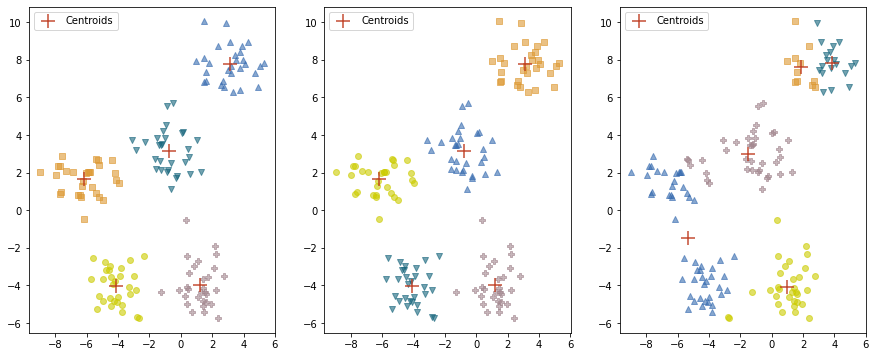

In [21]:
def plot_clusters_2c(df,mu,col):

    mu = np.array(mu)
    
    color = ["#386cb0", "#dd9933", "#cccc00","#a2868e","#16657c" ]
    marker = ['^','s','o','P','v']

    for i in range(5):
        ax[col].scatter(df[df['Cluster']==i]['X'],df[df['Cluster']==i]['Y'],
                    color=color[i],
                    marker = marker[i],
                    alpha=0.6)

    ax[col].scatter(mu.T[0],mu.T[1],marker='+',color='#BD371B',s=200,label='Centroids',alpha=0.9)
    ax[col].legend()

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15,6))

plot_clusters_2c(df1,mu_new1,0)
plot_clusters_2c(df2,mu_new2,1)
plot_clusters_2c(df3,mu_new3,2)

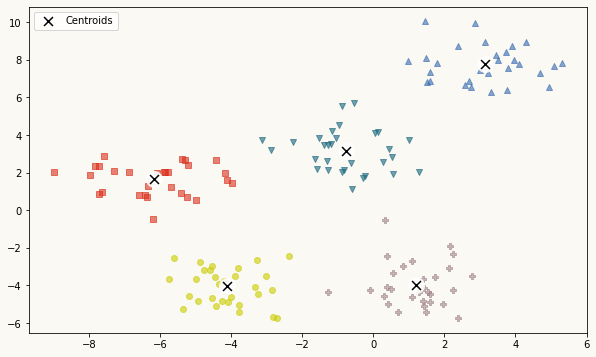

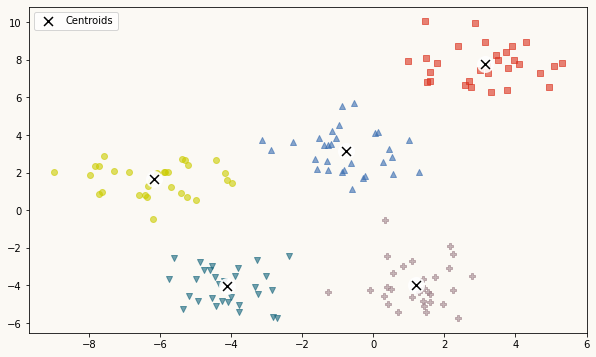

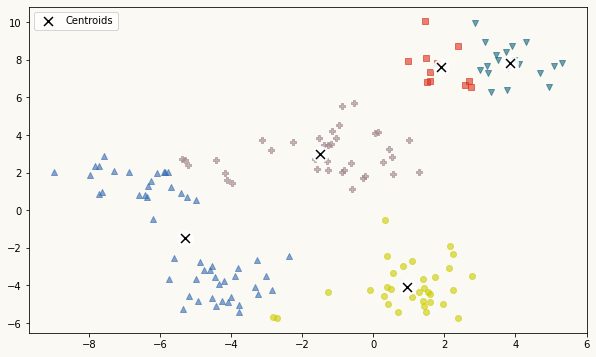

In [22]:
def plot_2(df,mu):
    #Plotting final partitions
    fig, ax = plt.subplots(figsize= (10, 6))
    fig.patch.set_facecolor("#fbf9f4")
    ax.set_facecolor("#fbf9f4")

    for i in range(5):
        plt.scatter(df[df['Cluster']==i]['X'],df[df['Cluster']==i]['Y'],
                    color=color[i],
                    marker = marker[i],
                    alpha=0.6)
    plt.scatter(mu.T[0],mu.T[1],marker='o',linewidths=8,color='w',s=80,zorder=10,alpha=0.9)
    plt.scatter(mu.T[0],mu.T[1],marker='x',color='k',s=80,label='Centroids',zorder=11,alpha=1)

    plt.legend(loc='upper left')
    plt.show()

color = ["#386cb0", "#da2f1b", "#cccc00","#a2868e","#16657c" ]
marker = ['^','s','o','P','v']

plot_2(df1,mu_new1)
plot_2(df2,mu_new2)
plot_2(df3,mu_new3)

# Part 2. Spectral Clustering Analysis

**Gaussian Similarity**

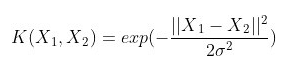

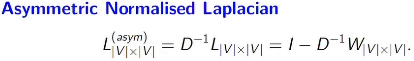

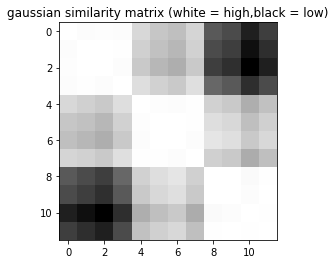

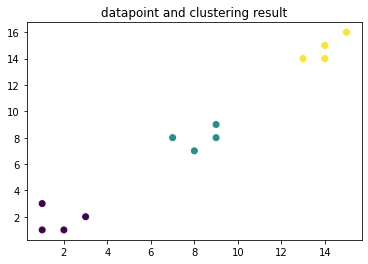

In [26]:
# Here you are to implement the asymmetric normalised spectral clustering algorithm.

from sklearn.metrics import pairwise_distances
from numpy.linalg import inv
from scipy.linalg import eigh
import math

def gaussian_similarity(x,delta):
    """
    # Compute the similarity matrix for spectral clustering using an RBF kernel
    # Construction of similarity matrix is diverse and non-trivial, this
    # is only one of the types.
    # Also, the parameter delta has large influence on the final result

    Input:
        - X: (n,d), n datapoints each with d dimension
        - delta: scalar, width of RBF kernel
    
    Return:
        - W: (n,n) similarity matrix
    """
    
    dist = pairwise_distances(x,x,metric='euclidean')
    dist = np.square(dist)

    dist = -dist/(2*delta*delta)
    similarity = np.exp(dist)
    return similarity

def asymmetric_SC(W,k = 1):
    """
    # Compute the spectral clustering according to [Shi and Malik 2000]
    # See http://citeseerx.ist.psu.edu/viewdoc/summary?doi=10.1.1.165.9323
    Input:
        - W: (n,n), similarity matrix or weighted adjacency matrix
        - k: scalar, number of clusters
    
    Return:
        - lb: (n,) label for each datapoint
        - e: 1-d array of eigen value
        - v: 2-d matrix, each column is an eigen vector
    """
    ###
    # Hint: Be wary that "Asymmetric Normalized" spectral clustering does eigen analysis on D^-1 * L .
    #       See lecture slides if you don't know how to start 
    #
    # Hint: Computing the invert matrix is computationally expensive for high-dimensional
    #       matrices. But here, we only need to the invert a diagonal matrix, which is simple to compute.
    #
    # Hint: There is no unreal eigen value here, but sometimes numerical precision problems happen.
    #       Use np.real when necessary.
    #
    # First do eigen analysis. 
    
    n = W.shape[0]
    row_sum = np.sum(W,axis=1)
    I = np.eye(n)
    D = I*row_sum
    
    D_inv = inv(D)
    L_unnorm = D - W
    L = D_inv * L_unnorm
    
    val, vec = eigh(L_unnorm, D, eigvals_only=False)
    
    sorted_index = np.argsort(val)[::1]
    sorted_eigenvalue = val[sorted_index]
    sorted_eigenvectors = vec[:,sorted_index]
    
    if sorted_eigenvalue[0]==0:
        subset_eigvecs = sorted_eigenvectors[:,1:k+1]
    else:
        subset_eigvecs = sorted_eigenvectors[:,0:k]
        
    
    kmeans = KMeans(n_clusters=k)
    indx = kmeans.fit_predict(subset_eigvecs)
    
    #return lb,e,v
    return indx ,sorted_eigenvalue , sorted_eigenvectors

# The following code to be used for testing student's implementation during marking. Don't change!

X = np.array([
    [1, 3], [2, 1], [1, 1],
    [3, 2], [7, 8], [9, 8],
    [9, 9], [8, 7], [13, 14],
    [14, 14], [15, 16], [14, 15]
])

W = gaussian_similarity(X,delta = 38)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')
plt.show()

lb,_,_ = asymmetric_SC(W,3)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

**Hyperparameter tuning**

The hyperparameter delta is used to control the width of the neighbourhoods.<br>
The main goal is to make sure that data points in close proximity to each other are connected whilst points far apart do not have a link. <br>
Essentially, points close to each other will have high similiarity and vice versa.<br>
To quantify this, we can use cosine similarity which is a measure of similarity between data points.<br>
For different delta values, we can compare the resultant gaussian similarity output with cosine similarity and the delta value for which both the values are closest, is the optimal delta value

In [27]:
from sklearn.metrics.pairwise import cosine_similarity

def gaussian_similarity_tuning(x,delta):
    """
    # Compute the similarity matrix for spectral clustering using an RBF kernel
    # Construction of similarity matrix is diverse and non-trivial, this
    # is only one of the types.
    # Also, the parameter delta has large influence on the final result

    Input:
        - X: (n,d), n datapoints each with d dimension
        - delta: scalar, width of RBF kernel
    
    Return:
        - W: (n,n) similarity matrix
    """
    
    dist = pairwise_distances(x,x)
    dist = np.square(dist)
    n_points = x.shape[0]

    dist = -dist/(2*delta*delta)
    similarity = np.exp(dist)
    
    c = cosine_similarity(x, dense_output=True)
    diff = np.abs(np.sum(c-similarity))
    return similarity,diff

In [28]:
X = np.load('./Data/SC_data_1.npy')

tuning = {}

ran = np.linspace(0.1,40,50)
for delta in ran:

    W,diff = gaussian_similarity_tuning(X,delta = delta)
    tuning[delta] = diff

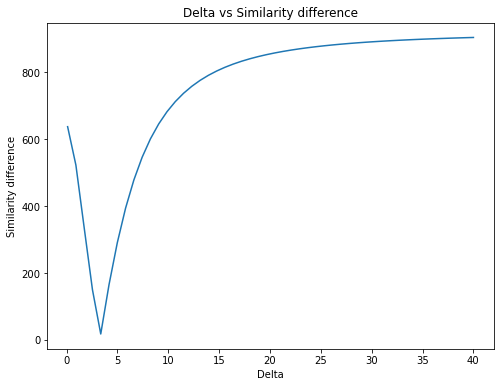

a) One hyperparameter value for Gaussian kernel: 3


In [29]:
plt.figure(figsize=(8, 6))
plt.plot(tuning.keys(),tuning.values())
plt.title("Delta vs Similarity difference")
plt.xlabel("Delta")
plt.ylabel("Similarity difference")
plt.show()
print('a) One hyperparameter value for Gaussian kernel: 3')

**Computational Evidence:**<br>
Optimal delta

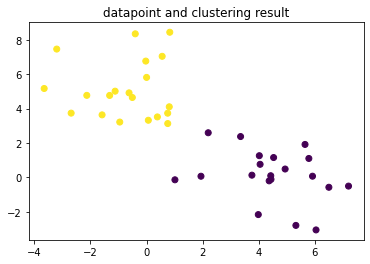

In [30]:
W,diff = gaussian_similarity_tuning(X,delta = 3)
lb,_,_ = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

**Suggesting alternative method of calculating similarity using self-tuning**

In [31]:
def gaussian_similarity_new(x,delta):
    """
    Input:
        - X: (n,d), n datapoints each with d dimension
        - delta: scalar, width of RBF kernel
    
    Return:
        - W: (n,n) similarity matrix
    """
    
    dist = pairwise_distances(x,x)
    dist = np.square(dist)
    n_points = x.shape[0]
    
    v = math.floor(n_points/2)
    dist2 = np.sort(dist)[:,0:100]
    sigma = np.mean(dist2,axis=1)  
    sigma=sigma.tolist()

    for i in range(len(dist)):
        for j in range(len(dist[0])):
            v = min(sigma[i],sigma[j])
            if dist[i][j]<v:
                dist[i][j] = dist[i][j]
            else:
                dist[i][j] = 9999

    dist = -dist/(2)
    similarity = np.exp(dist)
    
    return similarity

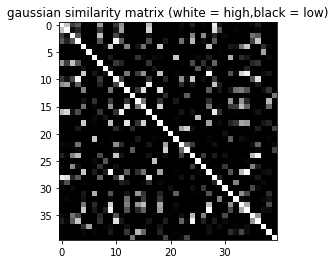

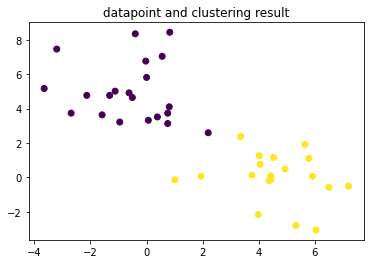

In [33]:
#delta is self-tuning; passing any delta value to show it will tune automatically
W = gaussian_similarity_new(X,delta = 1000)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')
plt.show()

lb,eigval,eigvec = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

Picking one delta value for all the datasets may not be optimal.<br>Instead, for each data point, we can use a specific scaling parameter for each point allows self-tuning of the point-to-point
distances according to the local statistics of the neighborhoods.<br>
For a region with well defined clusters, a relaxed delta value will made do, but for a tightly packed delta value, slight variation in the delta value will make a lot of difference on the connectivity.<br>
We can calculate the neighbors distance for a given point, and if a given point is under that threshold distance, we can say it is a neighbor of the given point, otherwise it is not.

**Paper:** https://proceedings.neurips.cc/paper/2004/file/40173ea48d9567f1f393b20c855bb40b-Paper.pdf

**Performing eigenanalysis on L**

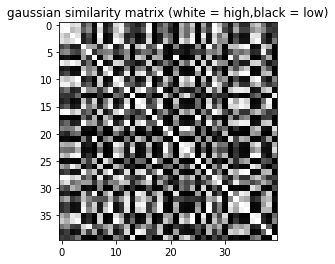

b) First non-zero eigen vector (rounded): 
 [[-0.09 -0.06 -0.13 -0.13  0.13  0.06  0.2  -0.11  0.19  0.15]
 [-0.14 -0.09  0.12 -0.23  0.16  0.13 -0.08  0.26  0.13 -0.17]
 [-0.25  0.22 -0.15 -0.18 -0.15  0.24 -0.16  0.15 -0.08  0.01]
 [-0.21  0.18  0.06  0.15  0.15 -0.16 -0.15  0.08  0.15 -0.23]]


In [34]:
# PS: in b), please do eigen analysis of 'L', not D^-1 L.
# Load data.

X = np.load('./Data/SC_data_1.npy')
# a)

W = gaussian_similarity(X,delta = 3)

plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')
plt.show()

#Using L instead of D^-1 L.
n = W.shape[0]
row_sum = np.sum(W,axis=1)
I = np.eye(n)
D = I*row_sum
L_unnorm = D - W
val, vec = np.linalg.eig(L_unnorm)
sorted_index = np.argsort(val)[::1]
sorted_eigenvalue = val[sorted_index]
sorted_eigenvectors = vec[:,sorted_index]

if int(sorted_eigenvalue[0])!=0:
    i = 0
else:
    i=1
print('b) First non-zero eigen vector (rounded): \n', np.reshape(np.round(sorted_eigenvectors[:,i],2),(4,10)))

**Eigengap to determine optimal number of clusters**

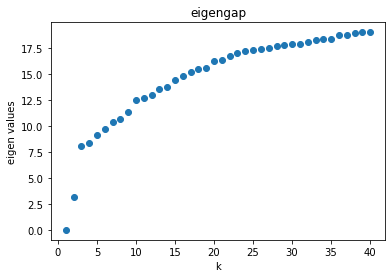

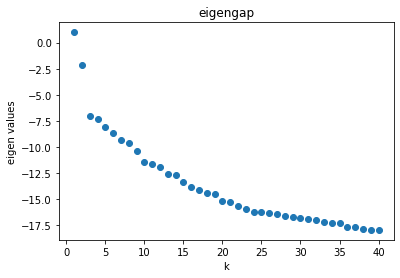

c)  2  clusters, because the eigen gap is the maxiumum after 2 clusters


In [35]:
# c) 
# Most stable clustering is usually decided by a K that maximizes the
# eigengap (see the lecture slide)

ep = [i for i in range(1,sorted_eigenvectors.shape[0]+1)]
new_eg = 1 - sorted_eigenvalue

plt.scatter(ep,sorted_eigenvalue)
plt.xlabel("k")
plt.ylabel("eigen values")
plt.title("eigengap",size=12)
plt.show()

plt.scatter(ep,new_eg)
plt.xlabel("k")
plt.ylabel("eigen values")
plt.title("eigengap",size=12)
plt.show()
print('c) ', 2, ' clusters, because the eigen gap is the maxiumum after 2 clusters' )

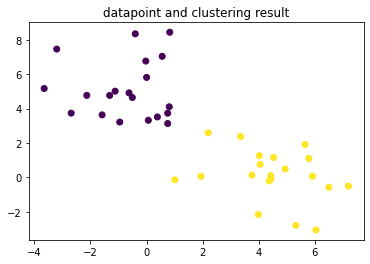

In [36]:
lb,eigval,eigvec = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X[:,0],X[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

**Performing eigenanalysis on D^-1 L**

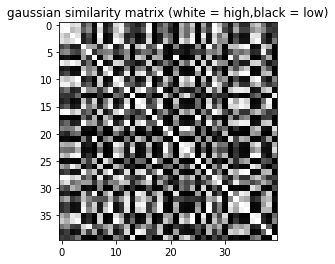

b) First non-zero eigen vector (rounded): 
 [[-0.03 -0.02 -0.04 -0.04  0.04  0.02  0.05 -0.03  0.05  0.04]
 [-0.04 -0.03  0.03 -0.05  0.05  0.04 -0.02  0.06  0.04 -0.05]
 [-0.06  0.06 -0.04 -0.05 -0.04  0.06 -0.04  0.04 -0.03  0.  ]
 [-0.05  0.05  0.02  0.04  0.04 -0.05 -0.04  0.02  0.04 -0.05]]


In [38]:
X = np.load('./Data/SC_data_1.npy')

# a)
W = gaussian_similarity(X,delta = 3)
plt.figure()
plt.title('gaussian similarity matrix (white = high,black = low)')
plt.imshow(W,cmap = 'gray')
plt.show()

lb,eigval,eigvec = asymmetric_SC(W,1)

if np.round(eigval[0],2)!=0:
    i = 0
else:
    i=1
print('b) First non-zero eigen vector (rounded): \n', np.reshape(np.round(eigvec[:,i],2),(4,10)))

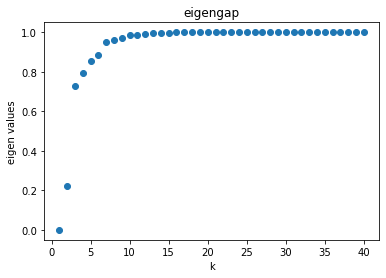

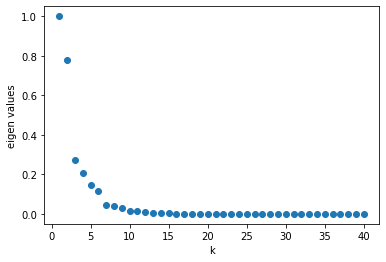

c)  2  clusters, because the eigen gap is the maxiumum after 2 clusters


In [39]:
ep = [i for i in range(1,eigvec.shape[0]+1)]
new_eg = 1 - eigval
plt.scatter(ep,eigval)
plt.xlabel("k")
plt.ylabel("eigen values")
plt.title("eigengap",size=12)
plt.show()

plt.scatter(ep,new_eg)
plt.xlabel("k")
plt.ylabel("eigen values")
plt.show()

print('c) ', 2, ' clusters, because the eigen gap is the maxiumum after 2 clusters' )

Using the eigengap heuristic to choose a suitable value for the number of clusters (2 seems to be a good choice as λ2−λ1 is large compared to λ3−λ2

Reference: https://arxiv.org/pdf/0711.0189.pdf

<Figure size 2160x720 with 0 Axes>

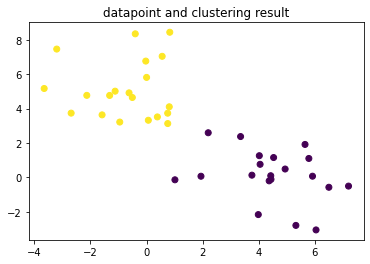

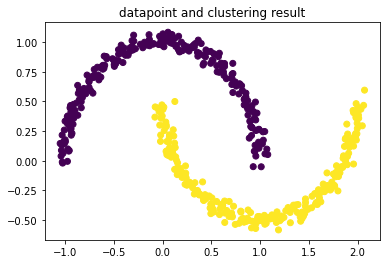

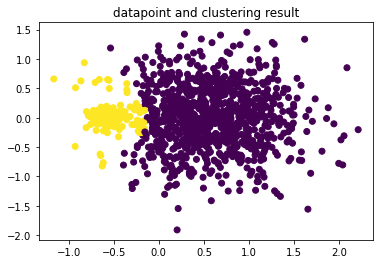

In [47]:
# Load data

X1 = np.load('./Data/SC_data_1.npy')
X2 = np.load('./Data/SC_data_2.npy')
X3 = np.load('./Data/SC_data_3.npy')

plt.figure(figsize=(30, 10))

W = gaussian_similarity(X1,delta = 3)
lb,eigval,eigvec = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

W = gaussian_similarity(X2,delta = 0.1)
lb,eigval,eigvec = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()


W = gaussian_similarity(X3,delta = 0.21)
lb,eigval,eigvec = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X3[:,0],X3[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

<Figure size 2160x720 with 0 Axes>

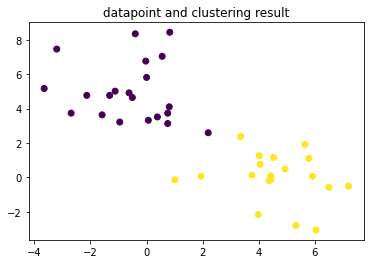

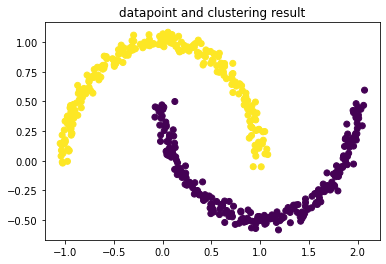

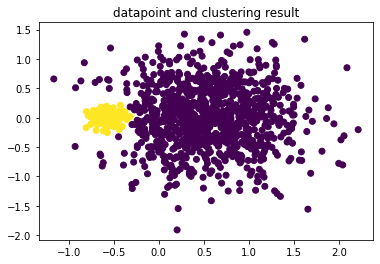

In [42]:
# Load data

X1 = np.load('./Data/SC_data_1.npy')
X2 = np.load('./Data/SC_data_2.npy')
X3 = np.load('./Data/SC_data_3.npy')

plt.figure(figsize=(30, 10))

#Implementing with self-tuning algorithm
W = gaussian_similarity_new(X1,delta = 0)
lb,eigval,eigvec = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X1[:,0],X1[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

W = gaussian_similarity_new(X2,delta = 0)
lb,eigval,eigvec = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X2[:,0],X2[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()


W = gaussian_similarity_new(X3,delta = 0)
lb,eigval,eigvec = asymmetric_SC(W,2)
plt.figure()
plt.scatter(X3[:,0],X3[:,1],c = lb)
plt.title('datapoint and clustering result')
plt.show()

The algorithm does not work for the 3rd dataset;<br>
There isn't enough networking in the dataset to provide a clean and clear distinction of connection which can be explained via an optimal cut.<br>
Since spectral clustering uses the concept of **'connectivity'** to define clusters, there isn't enough distinction in the dataset in terms of connectivity for the algorithm to create ideal/optimum clusters.

# Part 3. Hierarchical Clustering Analysis

In [313]:
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram

X = np.load('./Data/HC_data.npy')

# (a)
plt.figure(figsize=(15, 5))
link_types = ['single','complete','average']
plt.show()

<Figure size 1080x360 with 0 Axes>

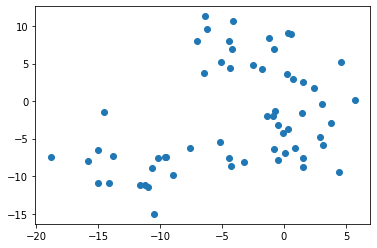

In [314]:
plt.scatter(X.T[0],X.T[1])

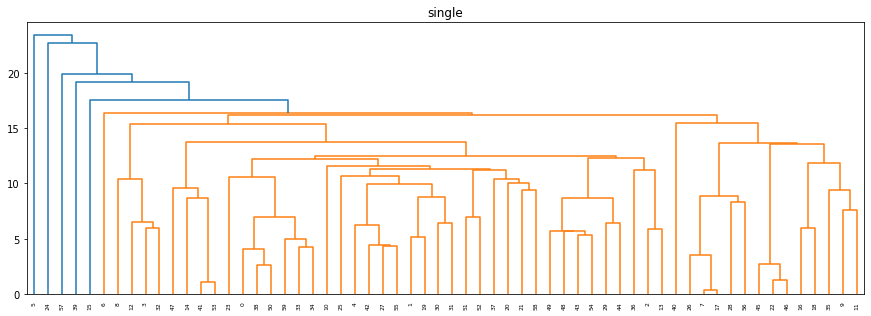

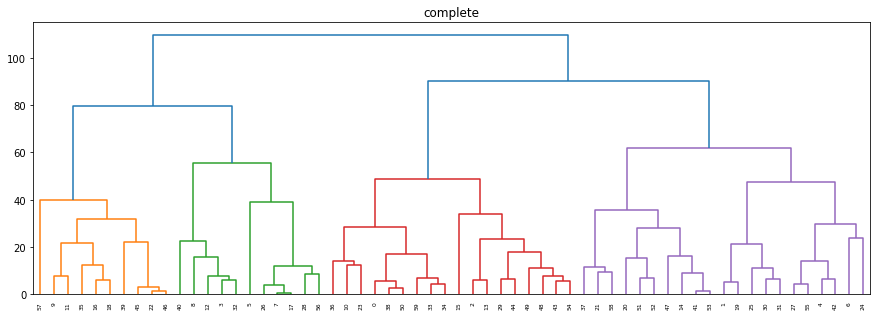

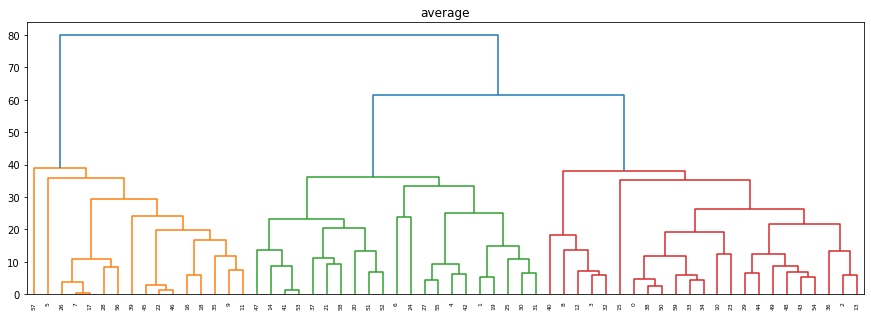

In [113]:
dist = pairwise_distances(X,X)
for link in link_types:
    plt.figure(figsize=(15, 5))
    d = dendrogram(linkage(dist, method=link))
    plt.title(link)
    plt.show()

In [315]:
dist = pairwise_distances(X,X)

Z_single = linkage(dist, 'single')
Z_complete = linkage(dist, 'complete')
Z_average = linkage(dist, 'average')

In [316]:
# (b) Implement the following function to the longest K-cluster lifetime from a dedrogram 

import operator

def get_longest_lifetime(Z):
    """
    :param Z:   A (N,4) shape matrix. At the i-th iteration,
                clusters with indices Z[i, 0] and Z[i, 1] are combined
                to form cluster . A cluster with an index less than n
                corresponds to one of the n original observations.
                The distance between clusters Z[i, 0] and Z[i, 1] is
                given by Z[i, 2]. The fourth value Z[i, 3] represents
                the number of original observations in the newly formed cluster.
    
    :return:    (lifetime, k): [float,int];
                lifetime - the maximum lifetime detected.
                k - number of clusters for which the maximum lifetime was detected.
    """
    
    n = Z.shape[0]
    k_clust = {}
    k_clust[n+1] = 0  
    for it in Z:
        keys = sorted(k_clust)
        indx = keys[0]
        k_clust[indx] = it[2]
        k_clust[indx-1] = 0

        
    sorted_d = sorted(k_clust.items(), key=operator.itemgetter(1),reverse=True)
    
    ls = [sorted_d[0][1],sorted_d[0][0]]
    return ls

# Do NOT delete line below
print(get_longest_lifetime(np.array([[0,3],[1,2],[2,3],[2,3]],dtype='float').T))

[3.0, 2]


In [317]:
print("Single-linkage:\n",get_longest_lifetime(Z_single))

Single-linkage:
 [23.41101220387537, 2]


In [318]:
print("Complete-linkage:\n",get_longest_lifetime(Z_complete))

Complete-linkage:
 [109.60086321017663, 2]


In [319]:
print("Average-linkage:\n",get_longest_lifetime(Z_average))

Average-linkage:
 [79.9427253650516, 2]


In [119]:
label_single = fcluster(Z_single, 2, criterion='maxclust')
label_complete = fcluster(Z_complete, 2, criterion='maxclust')
label_average = fcluster(Z_average, 2, criterion='maxclust')

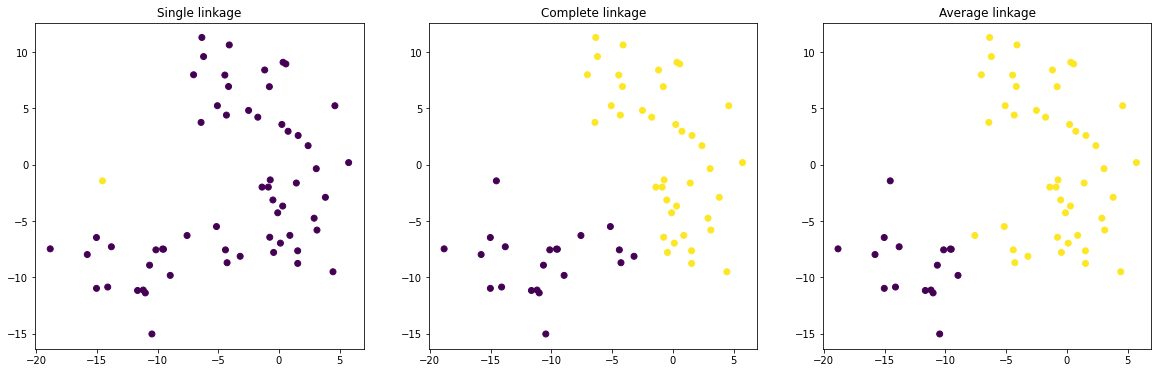

In [120]:
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(20,6))

ax[0].scatter(X.T[0],X.T[1],c=label_single)
ax[0].title.set_text("Single linkage")

ax[1].scatter(X.T[0],X.T[1],c=label_complete)
ax[1].title.set_text("Complete linkage")

ax[2].scatter(X.T[0],X.T[1],c=label_average)
ax[2].title.set_text("Average linkage")

# Part 4. Ensemble Clustering Analysis

In [121]:
# Let's firstly compute the co-association matrix for single cluster result

def compute_co_matrix_for_single_cluster(y):
    """
    # Compute the co-association matrix for single clustering result
    # It will also be used later to compute multiple clustering result
    
    Input:
        - y: (n) Label of each Datapoint
    
    Return:
        - co_matrix: (n,n). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to. Surely,
                      in the case of single cluster result, this number will be
                      either 0 or 1. Whether they belong to the same cluster component
                      can be judged by 'y[i] == y[j]'
    """
    # Initialize the co-association matrix
    n = y.shape[0]
    co_matrix = np.zeros(shape=(n,n))

    for i in range(n):
        for j in range(n):
            if y[i] ==y[j]:
                co_matrix[i][j] = 1
                
                
    return co_matrix


# The following code to be used for testing student's implementation during marking. Don't change!
y = np.array([0,1,0,1,0])
co_matrix_tmp = compute_co_matrix_for_single_cluster(y)
co_matrix_tmp

array([[1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1.]])

In [122]:
# Now compute the co-association matrix for multiple cluster result
# Hint: You can reuse the 'compute_co_matrix_for_single_cluster(y)' function.

def compute_co_matrix(y_list):
    """
    # Compute the co-association matrix
    
    Input:
        - y_list: List of lenth (N). Each element is a clustering label vector,
                  which is the same as the 'y' defined in function 
                  'compute_co_matrix_for_single_cluster(y)'
                  N is the number of clustering results you are to ensemble.
    
    Return:
        - co_matrix: (N,N). the (i,j) element is the number of same cluster components
                      that datapoint X[i] and datapoint X[j] belong to, divided
                      by N. 
                      
                      
    """
    n = len(y_list[0])
    co_matrix = np.zeros(shape=(n,n))
    
    for y in y_list:
        co_matrix_tmp = compute_co_matrix_for_single_cluster(np.array(y))
        
        co_matrix = co_matrix + co_matrix_tmp
    co_matrix = co_matrix/len(y_list)
    return co_matrix

# The following code to be used for testing student's implementation during marking. Don't change!
y1 = np.array([0,1,0,1,0])
y2 = np.array([0,1,1,1,0])
y3 = np.array([0,1,1,1,1])
co_matrix = compute_co_matrix([y1,y2])
print(co_matrix)

[[1.  0.  0.5 0.  1. ]
 [0.  1.  0.5 1.  0. ]
 [0.5 0.5 1.  0.5 0.5]
 [0.  1.  0.5 1.  0. ]
 [1.  0.  0.5 0.  1. ]]


In [267]:
# Implement the ensemble clustering given a co_matrix
from scipy.spatial.distance import squareform

def ensemble_clustering(co_matrix, link_type = 'single'):
    """
    Ensemble the clustering results with Agglomerative Clustering
    
    Input: 
        - co_matrix: (n,n) co-assocication matrix. n is the number of datapoints. 
        - linkage: string, can be one of {'single','ward','average','complete'}
        
    Output: 
        - Z: a (?,4) matrix, specifying how datapoints are clustered. 
             At the i-th iteration, clusters with indices Z[i, 0]
             and Z[i, 1] are combined to form cluster. A cluster 
             with an index less than corresponds to one of the 
             original observations. The distance between clusters Z[i, 0] 
             and Z[i, 1] is given by Z[i, 2]. The fourth value Z[i, 3] 
             represents the number of original observations in the newly 
             formed cluster.
             
             Z should be the return value of 'scipy.cluster.hierarchy.linkage'
             function.
    """
    
    co_matrix = 1 - co_matrix
    np.fill_diagonal(co_matrix, 0)
    Z = linkage(co_matrix, link_type)
    
    return Z

In [309]:
X = np.load('./Data/SC_data_2.npy')
y_list = []
np.random.seed(1) # Ensure the results are same on submission
# Now apply your ensemble clustering implementation with K-means

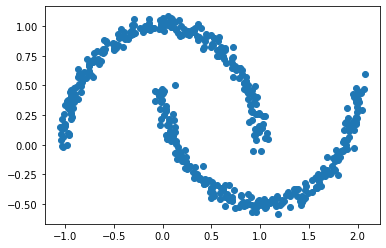

In [310]:
plt.scatter(X.T[0],X.T[1])

In [311]:
#Deciding on number of clusters for k-means

k = [i for i in range(2,22)]
f_ratio_ls = []

for k_val in k:
    kmeans = KMeans(n_clusters=k_val)
    indx = kmeans.fit_predict(X)
    f = f_ratio_euclidean(X,indx)
    f_ratio_ls.append(f)

Text(0.5, 1.0, 'Plotting F-ratio vs k')

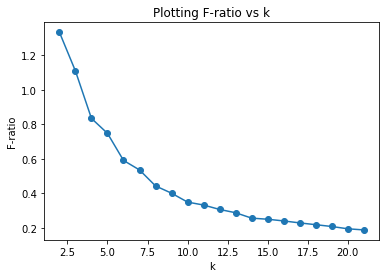

In [312]:
plt.plot(k,f_ratio_ls,marker='o')
plt.xlabel("k")
plt.ylabel("F-ratio")
plt.title("Plotting F-ratio vs k")

Since the elbow point is achieved at 10, we pick 10 to be the optimal number of clusters for k-means clustering

In [288]:
from numpy import random
# Computing initial partitions with 10 clusters
labels = []

for i in range(100):
    kmeans = KMeans(n_clusters=10,init='random',n_init=1).fit(X)
    lab = kmeans.predict(X)
    labels.append(lab)

In [289]:
co_matrix = compute_co_matrix(labels)
Z_single = ensemble_clustering(co_matrix, link_type = 'single')
Z_complete = ensemble_clustering(co_matrix, link_type = 'complete')
Z_average = ensemble_clustering(co_matrix, link_type = 'average')

In [290]:
print("Longest Lifetime for single-linkage:",get_longest_lifetime(Z_single))
print("Longest Lifetime for complete-linkage:",get_longest_lifetime(Z_complete))
print("Longest Lifetime for average-linkage:",get_longest_lifetime(Z_average))

Longest Lifetime for single-linkage: [5.9840370988154845, 2]
Longest Lifetime for complete-linkage: [9.67149936669594, 2]
Longest Lifetime for average-linkage: [8.77780896669243, 2]


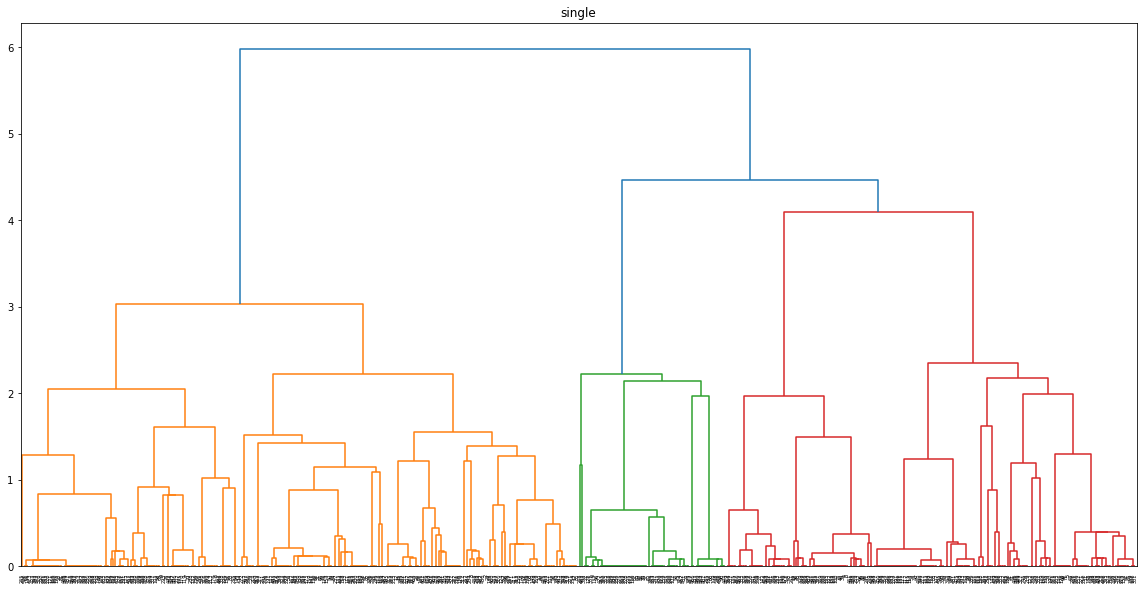

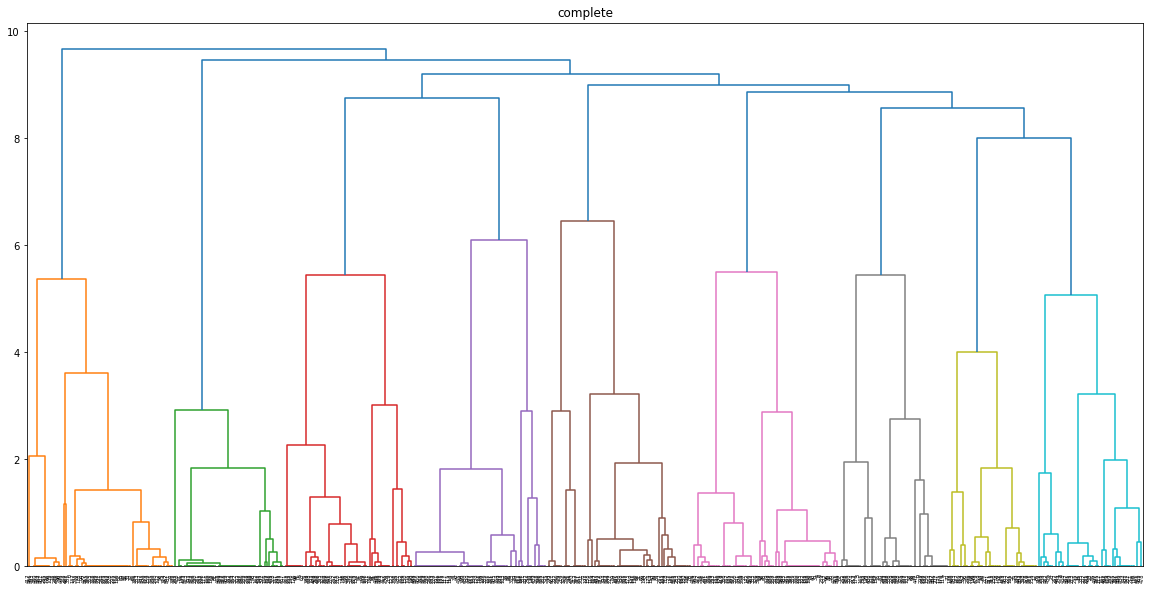

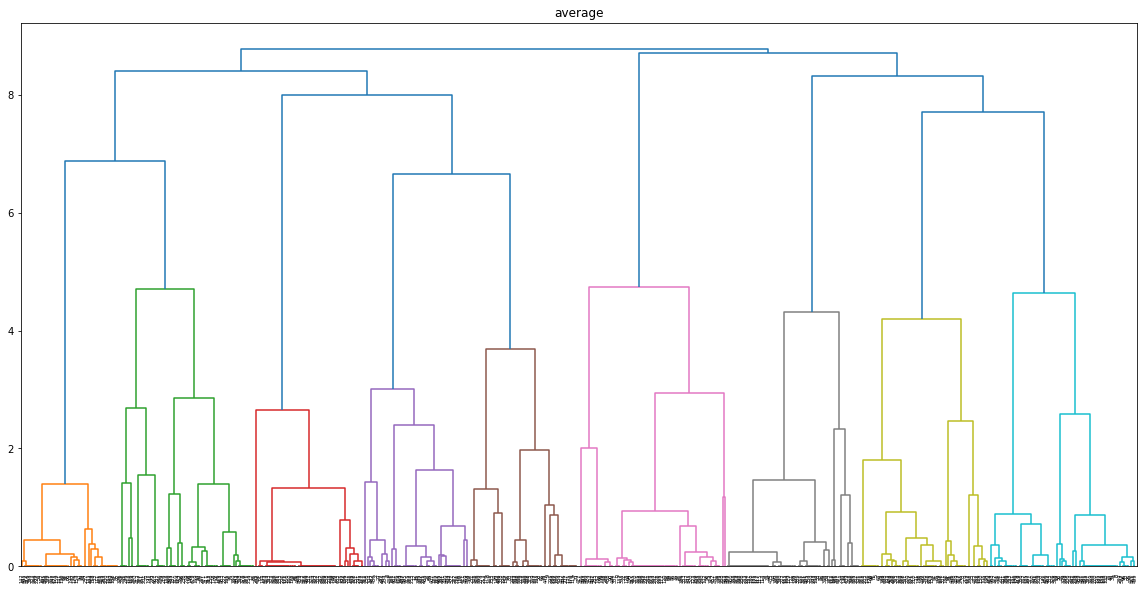

In [266]:
link_types = ['single','complete','average']
dist = co_matrix
for link in link_types:
    plt.figure(figsize=(20, 10))
    d = dendrogram(linkage(dist, method=link))
    plt.title(link)
    plt.show()

The longest lifetime of average-linkage and complete-linkagee is pretty close, but for this particular dataset, it makes more sense to pick average-linkage since the dataset is non-linear and having average-linkage as the cluster-distance metric is recommended.<br>Additionally, better results are obtained while using average-linkage.

In [297]:
label_average = fcluster(Z_average, 2, criterion='maxclust')

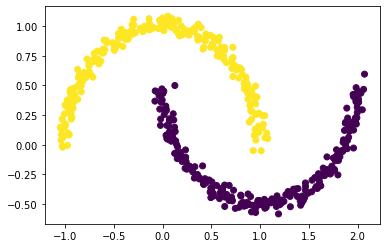

In [299]:
plt.scatter(X.T[0],X.T[1],c=label_average)

In [300]:
X = np.load('./Data/SC_data_3.npy')
y_list = []
np.random.seed(1)

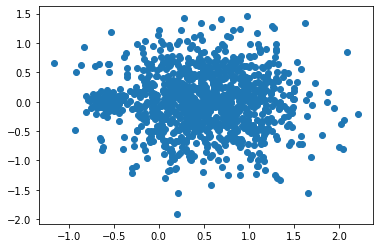

In [301]:
plt.scatter(X.T[0],X.T[1])

In [302]:
#Finding optimal number of clusters for k-means

k = [i for i in range(2,22)]
f_ratio_ls = []

for k_val in k:
    kmeans = KMeans(n_clusters=k_val)
    indx = kmeans.fit_predict(X)
    f = f_ratio_euclidean(X,indx)
    f_ratio_ls.append(f)

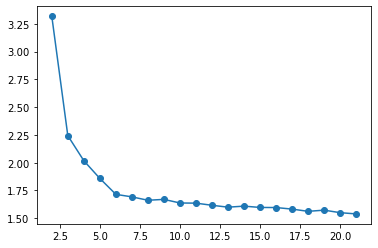

In [303]:
plt.plot(k,f_ratio_ls,marker='o')
plt.xlabel("k")
plt.ylabel("F-ratio")
plt.title("Plotting F-ratio vs k")

Since the elbow point is obtained at 6, we pick the optimal number of clusters for k-means to be 6

In [304]:
from numpy import random

labels = []

for i in range(100):
    kmeans = KMeans(n_clusters=6,init='random',n_init=1).fit(X)
    lab = kmeans.predict(X)
    labels.append(lab)

In [305]:
co_matrix = compute_co_matrix(labels)
Z_single = ensemble_clustering(co_matrix, link_type = 'single')
Z_complete = ensemble_clustering(co_matrix, link_type = 'complete')
Z_average = ensemble_clustering(co_matrix, link_type = 'average')

In [306]:
print("Longest Lifetime for single-linkage:",get_longest_lifetime(Z_single))
print("Longest Lifetime for complete-linkage:",get_longest_lifetime(Z_complete))
print("Longest Lifetime for average-linkage:",get_longest_lifetime(Z_average))

Longest Lifetime for single-linkage: [6.410670791734658, 2]
Longest Lifetime for complete-linkage: [19.7176545258304, 2]
Longest Lifetime for average-linkage: [17.92104335274134, 2]


Picking complete-linkage as the longest lifetime is the highest for complete-linkage and better results are obtained for complete-linkage

In [307]:
label_complete = fcluster(Z_complete, 2, criterion='maxclust')

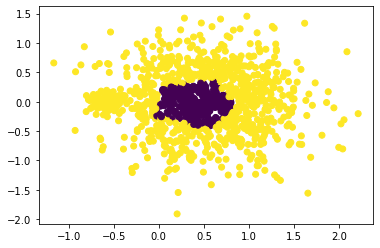

In [308]:
plt.scatter(X.T[0],X.T[1],c=label_complete)

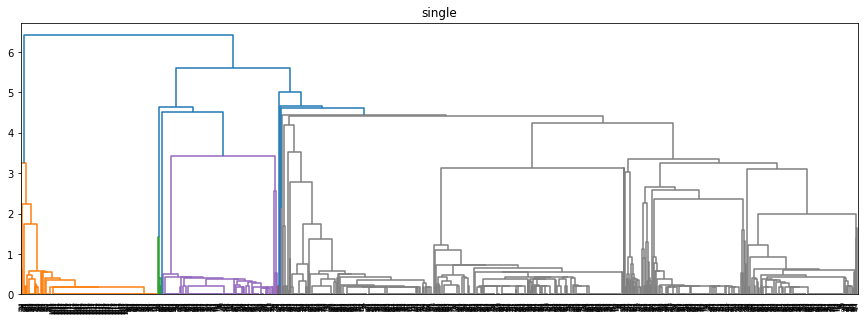

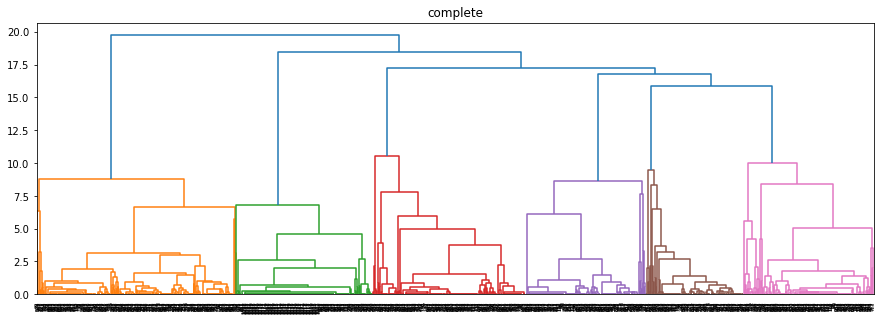

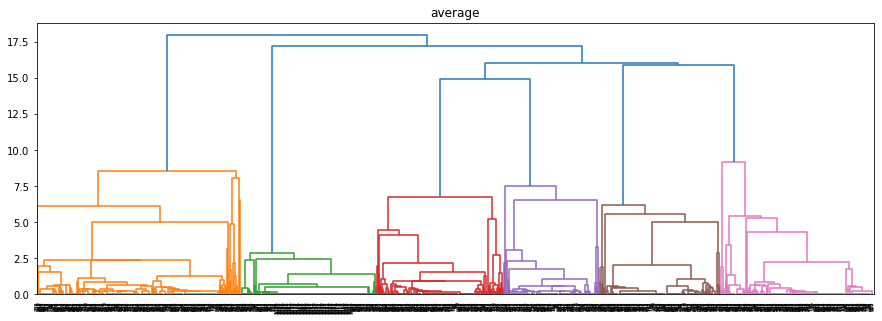

In [255]:
link_types = ['single','complete','average']
dist = co_matrix
for link in link_types:
    plt.figure(figsize=(20, 10))
    d = dendrogram(linkage(dist, method=link))
    plt.title(link)
    plt.show()